In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
dfa = pd.read_excel("earthquake_data.xlsx")

In [3]:
dfa

,id,flag_tsunami,year,month,day,hour,minute,second,focal_depth,eq_primary,...,longitude,region_code,injuries,injuries_description,damage_millions_dollars,damage_description,total_injuries,total_injuries_description,total_damage_millions_dollars,total_damage_description
0,338,No,1048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,771,Tsu,1580,4.0,6.0,NaN,NaN,NaN,33.0,6.2,...,1.309,120,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
2,7889,Tsu,1757,7.0,15.0,NaN,NaN,NaN,NaN,NaN,...,-6.320,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6697,Tsu,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6013,Tsu,1668,4.0,13.0,NaN,NaN,NaN,NaN,NaN,...,-71.050,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6067,5360,Tsu,1993,8.0,8.0,8.0,34.0,24.9,59.0,7.8,...,144.801,170,48.0,1.0,250.0,4.0,48.0,1.0,250.0,4.0
6068,5009,No,1983,12.0,22.0,1.0,2.0,2.4,26.0,6.4,...,151.868,170,NaN,NaN,25.0,4.0,NaN,NaN,25.0,4.0
6069,10307,No,2018,2.0,25.0,17.0,44.0,43.0,23.0,7.5,...,142.768,170,300.0,3.0,61.0,4.0,300.0,3.0,61.0,4.0
6070,5498,No,1998,7.0,9.0,5.0,19.0,7.3,10.0,6.2,...,-28.626,130,100.0,2.0,72.0,4.0,100.0,2.0,72.0,4.0


In [4]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             6072 non-null   int64  
 1   flag_tsunami                   6072 non-null   object 
 2   year                           6072 non-null   int64  
 3   month                          5667 non-null   float64
 4   day                            5515 non-null   float64
 5   hour                           4044 non-null   float64
 6   minute                         3838 non-null   float64
 7   second                         2721 non-null   float64
 8   focal_depth                    3120 non-null   float64
 9   eq_primary                     4286 non-null   float64
 10  eq_mag_mw                      1216 non-null   float64
 11  eq_mag_ms                      2916 non-null   float64
 12  eq_mag_mb                      1786 non-null   f

In [5]:
dfa.describe()

,id,year,month,day,hour,minute,second,focal_depth,eq_primary,eq_mag_mw,...,longitude,region_code,injuries,injuries_description,damage_millions_dollars,damage_description,total_injuries,total_injuries_description,total_damage_millions_dollars,total_damage_description
count,6072.000000,6072.000000,5667.000000,5515.000000,4044.000000,3838.000000,2721.000000,3120.000000,4286.000000,1216.000000,...,6022.000000,6072.000000,1169.000000,1349.000000,478.000000,4327.000000,1184.000000,1357.000000,418.000000,3148.000000
mean,4658.426219,1802.307477,6.510852,15.734361,11.308605,28.855915,29.740243,41.680769,6.471419,6.526563,...,37.985633,109.844368,2293.579127,1.975537,1715.606259,2.263693,2510.967061,1.973471,1978.743206,2.193139
std,2924.650010,377.924931,3.450167,8.752862,7.033485,17.151545,17.132196,71.258782,1.043968,0.937869,...,86.726852,53.963219,27095.202227,1.084074,12157.409978,0.956053,28273.298405,1.082526,12988.187606,1.041035
min,1.000000,-2150.000000,1.000000,1.000000,0.000000,0.000000,0.100000,0.000000,1.600000,3.600000,...,-179.984000,10.000000,1.000000,1.000000,0.013000,1.000000,1.000000,1.000000,0.010000,1.000000
25%,2142.750000,1818.000000,4.000000,8.000000,5.000000,14.000000,14.800000,11.000000,5.700000,5.800000,...,-8.000000,50.000000,10.000000,1.000000,3.625000,1.000000,10.000000,1.000000,4.310000,1.000000
50%,4608.500000,1927.000000,7.000000,16.000000,11.000000,30.000000,29.700000,26.000000,6.500000,6.500000,...,43.300000,130.000000,42.000000,2.000000,20.900000,2.000000,42.500000,2.000000,28.000000,2.000000
75%,6475.250000,1986.000000,9.000000,23.000000,17.000000,44.000000,44.500000,40.000000,7.300000,7.200000,...,115.500000,160.000000,200.000000,3.000000,204.350000,3.000000,200.000000,3.000000,300.000000,3.000000
max,10378.000000,2018.000000,12.000000,31.000000,23.000000,59.000000,59.900000,675.000000,9.500000,9.500000,...,180.000000,170.000000,799000.000000,4.000000,220000.000000,4.000000,799000.000000,4.000000,220085.456000,4.000000


In [6]:
dfa.describe().T

,count,mean,std,min,25%,50%,75%,max
id,6072.0,4658.426219,2924.650010,1.000,2142.75000,4608.5,6475.25000,10378.000
year,6072.0,1802.307477,377.924931,-2150.000,1818.00000,1927.0,1986.00000,2018.000
month,5667.0,6.510852,3.450167,1.000,4.00000,7.0,9.00000,12.000
day,5515.0,15.734361,8.752862,1.000,8.00000,16.0,23.00000,31.000
hour,4044.0,11.308605,7.033485,0.000,5.00000,11.0,17.00000,23.000
minute,3838.0,28.855915,17.151545,0.000,14.00000,30.0,44.00000,59.000
second,2721.0,29.740243,17.132196,0.100,14.80000,29.7,44.50000,59.900
focal_depth,3120.0,41.680769,71.258782,0.000,11.00000,26.0,40.00000,675.000
eq_primary,4286.0,6.471419,1.043968,1.600,5.70000,6.5,7.30000,9.500
eq_mag_mw,1216.0,6.526563,0.937869,3.600,5.80000,6.5,7.20000,9.500


In [7]:
dfa

,id,flag_tsunami,year,month,day,hour,minute,second,focal_depth,eq_primary,...,longitude,region_code,injuries,injuries_description,damage_millions_dollars,damage_description,total_injuries,total_injuries_description,total_damage_millions_dollars,total_damage_description
0,338,No,1048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,771,Tsu,1580,4.0,6.0,NaN,NaN,NaN,33.0,6.2,...,1.309,120,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
2,7889,Tsu,1757,7.0,15.0,NaN,NaN,NaN,NaN,NaN,...,-6.320,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6697,Tsu,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6013,Tsu,1668,4.0,13.0,NaN,NaN,NaN,NaN,NaN,...,-71.050,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6067,5360,Tsu,1993,8.0,8.0,8.0,34.0,24.9,59.0,7.8,...,144.801,170,48.0,1.0,250.0,4.0,48.0,1.0,250.0,4.0
6068,5009,No,1983,12.0,22.0,1.0,2.0,2.4,26.0,6.4,...,151.868,170,NaN,NaN,25.0,4.0,NaN,NaN,25.0,4.0
6069,10307,No,2018,2.0,25.0,17.0,44.0,43.0,23.0,7.5,...,142.768,170,300.0,3.0,61.0,4.0,300.0,3.0,61.0,4.0
6070,5498,No,1998,7.0,9.0,5.0,19.0,7.3,10.0,6.2,...,-28.626,130,100.0,2.0,72.0,4.0,100.0,2.0,72.0,4.0


In [8]:
dfa.isna().sum()

id                                  0
flag_tsunami                        0
year                                0
month                             405
day                               557
hour                             2028
minute                           2234
second                           3351
focal_depth                      2952
eq_primary                       1786
eq_mag_mw                        4856
eq_mag_ms                        3156
eq_mag_mb                        4286
intensity                        3324
country                             0
state                            5764
location_name                       1
latitude                           54
longitude                          50
region_code                         0
injuries                         4903
injuries_description             4723
damage_millions_dollars          5594
damage_description               1745
total_injuries                   4888
total_injuries_description       4715
total_damage

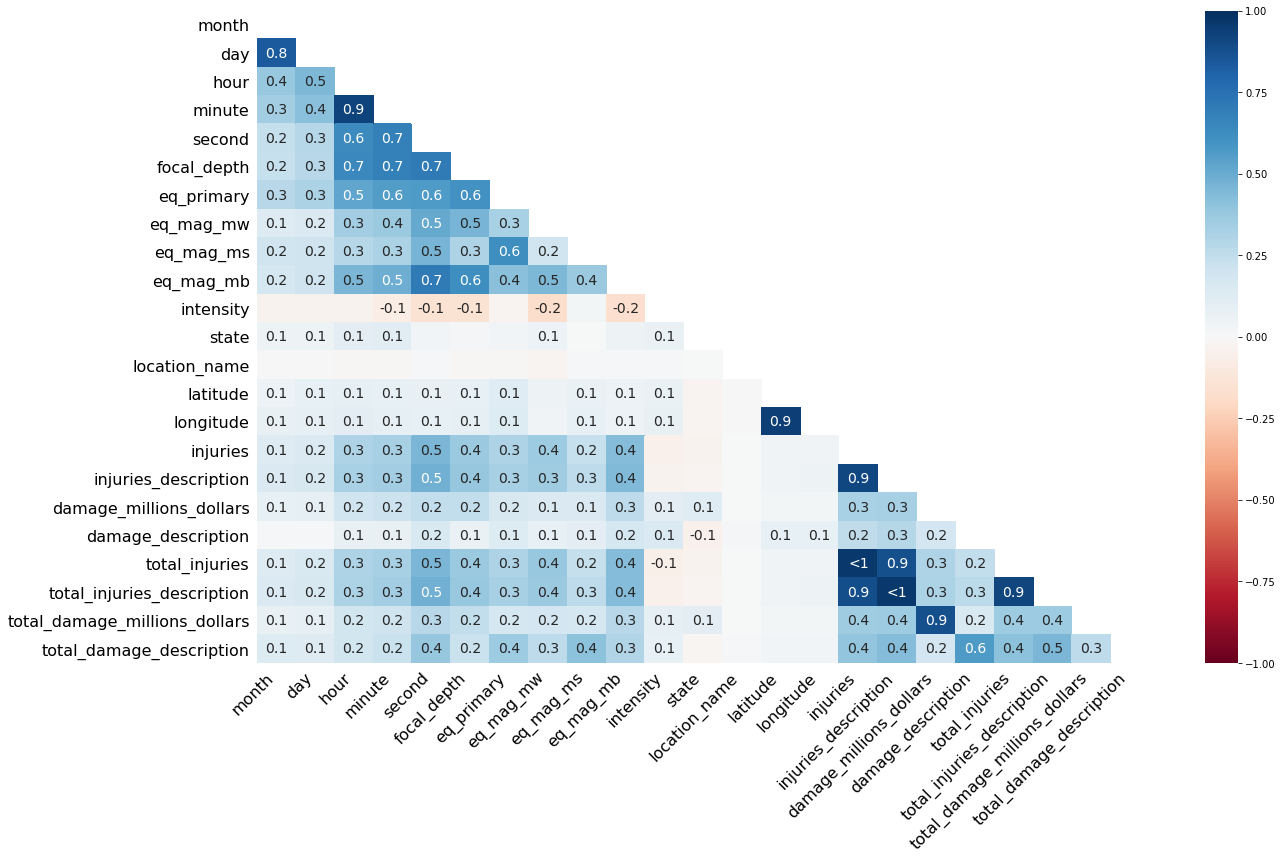

In [9]:
# nullity correlation heatmap 
msno.heatmap(dfa)
plt.show()

In [10]:
time_cols = ['year','month','day','hour','minute','second']

In [11]:
dfb = dfa.copy()

In [12]:
dfb[time_cols] = dfb[time_cols].fillna(0)

In [13]:
# scikit-learn

In [14]:
description_cols = [ 'injuries_description','damage_description', 'total_injuries_description', 'total_damage_description']

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
obji = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')

dfa[['state']] = obji.fit_transform(dfa[['state']])

In [17]:
dfa['damage_description'].value_counts()

2.0    1461
3.0    1309
1.0    1094
4.0     463
Name: damage_description, dtype: int64

In [18]:
dfa[['damage_description', 'damage_millions_dollars']].groupby('damage_description').mean()

,damage_millions_dollars
damage_description,
1.0,0.417211
2.0,3.078840
3.0,13.818806
4.0,3574.998799


In [19]:
category_means = dfa[['damage_description', 'damage_millions_dollars']].groupby('damage_description').mean()

In [20]:
replacement_values = category_means.damage_millions_dollars.to_dict()

replacement_values

{1.0: 0.4172105263157895,
 2.0: 3.0788402777777772,
 3.0: 13.818805970149256,
 4.0: 3574.9987991266385}

In [21]:
replacement_values[np.nan] = -1

In [22]:
dfa['damage_millions_dollars']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
6067    250.0
6068     25.0
6069     61.0
6070     72.0
6071     25.0
Name: damage_millions_dollars, Length: 6072, dtype: float64

In [23]:
dfa['damage_millions_dollars'].isna().sum()

5594

In [24]:
imputed_values = dfa['damage_description'].map(replacement_values)

In [25]:
imputed_values

0         -1.000000
1          3.078840
2         -1.000000
3         -1.000000
4         -1.000000
           ...     
6067    3574.998799
6068    3574.998799
6069    3574.998799
6070    3574.998799
6071    3574.998799
Name: damage_description, Length: 6072, dtype: float64

In [26]:
dfa['damage_millions_dollars'] = np.where(dfa['damage_millions_dollars'].isna(), 
                                         imputed_values, dfa['damage_millions_dollars'])

# np.where(if condition is true, replace with x, else keep y)

In [27]:
dfa[['damage_millions_dollars']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   damage_millions_dollars  6072 non-null   float64
dtypes: float64(1)
memory usage: 47.6 KB


### distribution values

In [ ]:
dfa['flag_tsunami']  # 0 or 1 

In [29]:
dfa['flag_tsunami'].value_counts()

No     4270
Tsu    1802
Name: flag_tsunami, dtype: int64

<AxesSubplot:>

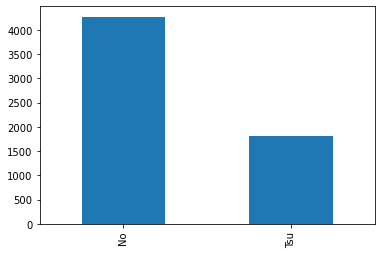

In [30]:
dfa['flag_tsunami'].value_counts().plot(kind='bar')

In [31]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             6072 non-null   int64  
 1   flag_tsunami                   6072 non-null   object 
 2   year                           6072 non-null   int64  
 3   month                          5667 non-null   float64
 4   day                            5515 non-null   float64
 5   hour                           4044 non-null   float64
 6   minute                         3838 non-null   float64
 7   second                         2721 non-null   float64
 8   focal_depth                    3120 non-null   float64
 9   eq_primary                     4286 non-null   float64
 10  eq_mag_mw                      1216 non-null   float64
 11  eq_mag_ms                      2916 non-null   float64
 12  eq_mag_mb                      1786 non-null   f

In [33]:
num_cols = dfa.select_dtypes(include=np.number)
obj_cols = dfa.select_dtypes(include=[np.object])

In [35]:
num_cols.columns

Index(['id', 'year', 'month', 'day', 'hour', 'minute', 'second', 'focal_depth',
       'eq_primary', 'eq_mag_mw', 'eq_mag_ms', 'eq_mag_mb', 'intensity',
       'latitude', 'longitude', 'region_code', 'injuries',
       'injuries_description', 'damage_millions_dollars', 'damage_description',
       'total_injuries', 'total_injuries_description',
       'total_damage_millions_dollars', 'total_damage_description'],
      dtype='object')

In [36]:
obj_cols.columns

Index(['flag_tsunami', 'country', 'state', 'location_name'], dtype='object')

In [37]:
num_cols.nunique().sort_values()

total_damage_description            4
total_injuries_description          4
damage_description                  4
injuries_description                4
intensity                          11
month                              12
region_code                        18
hour                               24
day                                31
eq_mag_mb                          47
eq_mag_mw                          54
eq_mag_ms                          55
minute                             60
eq_primary                         64
focal_depth                       197
total_damage_millions_dollars     233
damage_millions_dollars           248
injuries                          338
total_injuries                    344
second                            575
year                              946
latitude                         2885
longitude                        3654
id                               6072
dtype: int64

In [38]:
obj_cols.nunique().sort_values()

flag_tsunami        2
state              30
country           155
location_name    3821
dtype: int64

In [39]:
# primary earthquake magnitude vs corresponding num of injuries 

data_to_plot = dfa[~pd.isnull(dfa['injuries']) & ~pd.isnull(dfa['eq_primary'])]

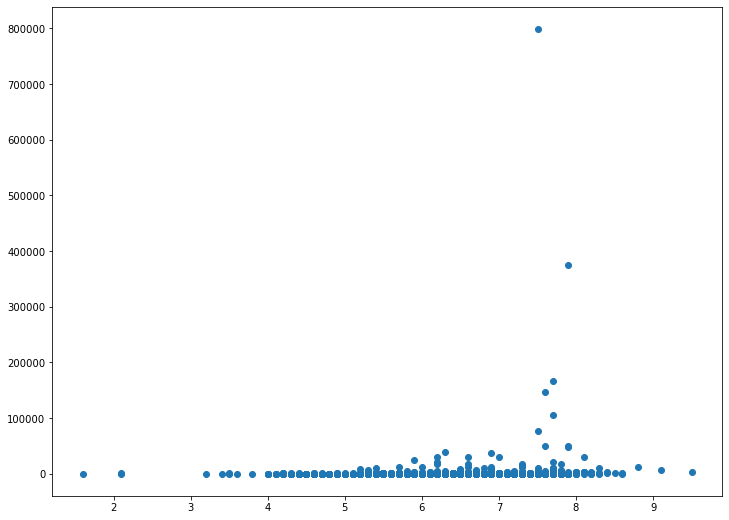

In [41]:
plt.figure(figsize=(12,9))
plt.scatter(data_to_plot['eq_primary'], data_to_plot['injuries'])
plt.show()

In [42]:
dfa.corr()

,id,year,month,day,hour,minute,second,focal_depth,eq_primary,eq_mag_mw,...,longitude,region_code,injuries,injuries_description,damage_millions_dollars,damage_description,total_injuries,total_injuries_description,total_damage_millions_dollars,total_damage_description
id,1.000000,0.388161,0.019170,0.000135,0.020322,0.005429,-0.024595,-0.094010,-0.314889,-0.244084,...,0.111369,-0.088774,-0.026274,-0.231918,0.011512,-0.346877,-0.017737,-0.233687,0.148667,-0.331459
year,0.388161,1.000000,-0.011841,-0.000288,0.004962,0.037139,0.003368,-0.021715,-0.107586,-0.179219,...,-0.007997,0.015007,0.000364,-0.134533,0.004807,-0.185298,0.004450,-0.124260,0.109914,-0.134642
month,0.019170,-0.011841,1.000000,0.020502,-0.008540,0.012102,0.029522,-0.005965,0.023819,0.052302,...,0.026280,-0.016603,-0.008942,0.005688,-0.019964,-0.003005,-0.020702,-0.000461,-0.081710,0.001663
day,0.000135,-0.000288,0.020502,1.000000,0.011447,0.033464,-0.015745,0.041488,0.014805,-0.010168,...,-0.010859,0.022490,0.033697,0.050462,0.002418,0.013518,0.029172,0.051819,-0.010303,0.010422
hour,0.020322,0.004962,-0.008540,0.011447,1.000000,0.002591,0.003550,0.020013,0.007083,0.062217,...,-0.015487,-0.010249,0.013056,0.021386,-0.007066,0.013242,0.023458,0.019388,-0.042012,0.014293
minute,0.005429,0.037139,0.012102,0.033464,0.002591,1.000000,0.003955,-0.010386,-0.017647,0.000707,...,0.009302,0.009344,0.011423,-0.032387,0.022014,-0.012358,0.022952,-0.033147,0.063397,-0.020799
second,-0.024595,0.003368,0.029522,-0.015745,0.003550,0.003955,1.000000,-0.040089,-0.036690,-0.005856,...,-0.024627,-0.009596,0.026487,0.050248,0.000129,0.041810,0.015147,0.049265,-0.021448,0.037235
focal_depth,-0.094010,-0.021715,-0.005965,0.041488,0.020013,-0.010386,-0.040089,1.000000,0.269882,0.225495,...,-0.021935,0.067037,-0.014242,0.009395,-0.020257,-0.034339,-0.016711,0.016337,-0.032135,-0.030305
eq_primary,-0.314889,-0.107586,0.023819,0.014805,0.007083,-0.017647,-0.036690,0.269882,1.000000,1.000000,...,0.000322,0.163709,0.106175,0.358773,0.073113,0.270164,0.104226,0.349010,0.158815,0.326076
eq_mag_mw,-0.244084,-0.179219,0.052302,-0.010168,0.062217,0.000707,-0.005856,0.225495,1.000000,1.000000,...,0.055516,0.164265,0.128447,0.384864,0.110443,0.287581,0.124740,0.362477,0.178322,0.324686


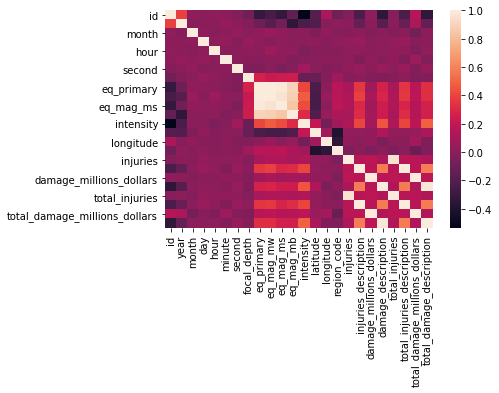

In [43]:
sns.heatmap(dfa.corr())
plt.show()

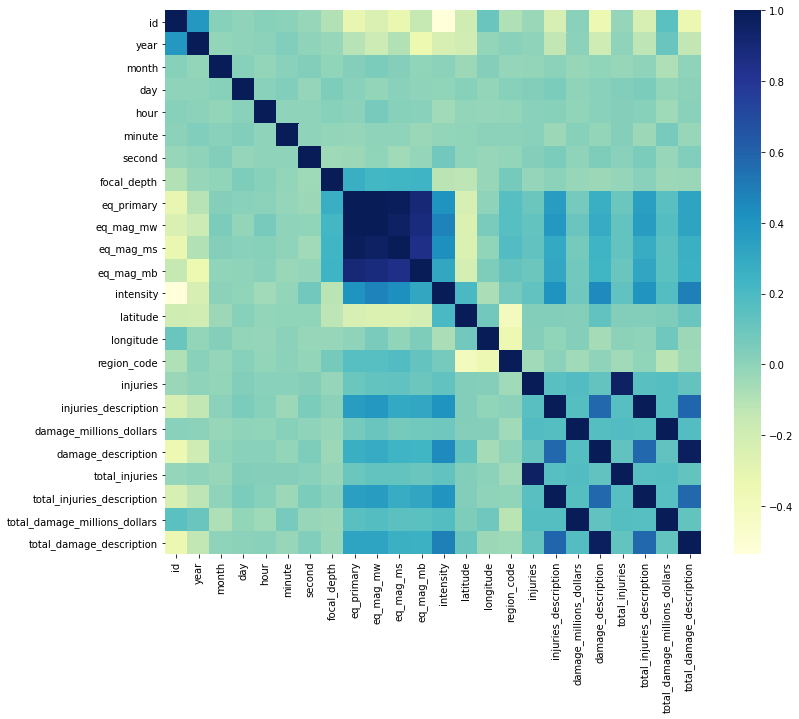

In [44]:
plt.figure(figsize=(12, 10))
sns.heatmap(dfa.corr(), cmap='YlGnBu')
plt.show()